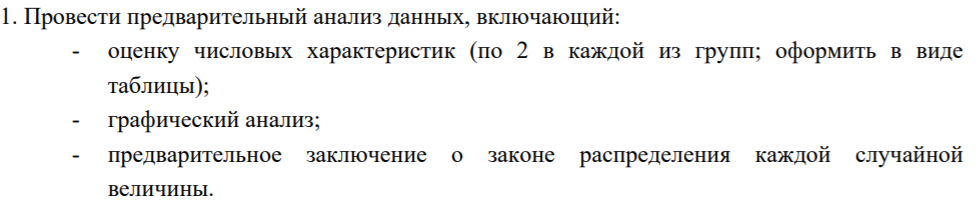

In [330]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics
plt.style.use('seaborn-whitegrid')


data = pd.read_excel('ms-data1.xlsx', header=None, index_col=None)
cnt_samples = data.shape[1]

base = [[0.]*cnt_samples for i in range (11)]
eval_charact = pd.DataFrame(base, index=["mean",
        "standart error",
        "median",
        "mode",
        "standard deviation",
        "variance",
        "kurtosis",
        "skewness",
        "span",
        "minimum",
        "maximun"], columns=['1','2','3','4','5','6','7'])

In [331]:
def evalution_of_characteristics(eval_charact):
    for i in range (cnt_samples):
        eval_charact.iloc[0, i] = data.iloc[:, i].mean()
        eval_charact.iloc[1, i] = pd.DataFrame.sem(data.iloc[:, i])
        eval_charact.iloc[2, i] = pd.DataFrame.median(data.iloc[:, i])
        eval_charact.iloc[3, i] = statistics.mode(data.iloc[:, i])
        eval_charact.iloc[4, i] = statistics.stdev(data.iloc[:, i])
        eval_charact.iloc[5, i] = statistics.variance(data.iloc[:, i])
        eval_charact.iloc[6, i] = pd.DataFrame.kurtosis(data.iloc[:, i])
        eval_charact.iloc[7, i] = pd.DataFrame.skew(data.iloc[:, i])
        eval_charact.iloc[8, i] = max(data.iloc[:, i]) - min(data.iloc[:, i])
        eval_charact.iloc[9, i] = min(data.iloc[:, i])
        eval_charact.iloc[10, i] = max(data.iloc[:, i])
    eval_charact = pd.DataFrame.round(eval_charact, decimals=3)
    return eval_charact


previous_eval_charct = evalution_of_characteristics(eval_charact)
print('Characteristics of position, spread, shape')
display(previous_eval_charct)

Characteristics of position, spread, shape


,1,2,3,4,5,6,7
mean,4.996,5.754,7.130,6.778,7.204,4.978,9.980
standart error,0.319,0.224,0.226,0.137,0.284,0.100,0.108
median,4.998,5.599,6.793,6.845,7.581,5.000,10.000
mode,7.463,-1.180,11.323,11.587,0.923,3.000,9.000
standard deviation,7.127,5.008,5.063,3.052,6.343,2.233,2.420
variance,50.797,25.075,25.630,9.317,40.240,4.987,5.855
kurtosis,-0.054,-0.181,0.227,-0.103,-1.183,-0.192,-0.150
skewness,0.025,0.285,0.136,-0.038,-0.062,0.354,0.058
span,42.512,28.613,36.525,18.144,21.626,12.000,14.000
minimum,-13.872,-6.765,-11.708,-2.545,-3.961,0.000,3.000


Populating the interactive namespace from numpy and matplotlib


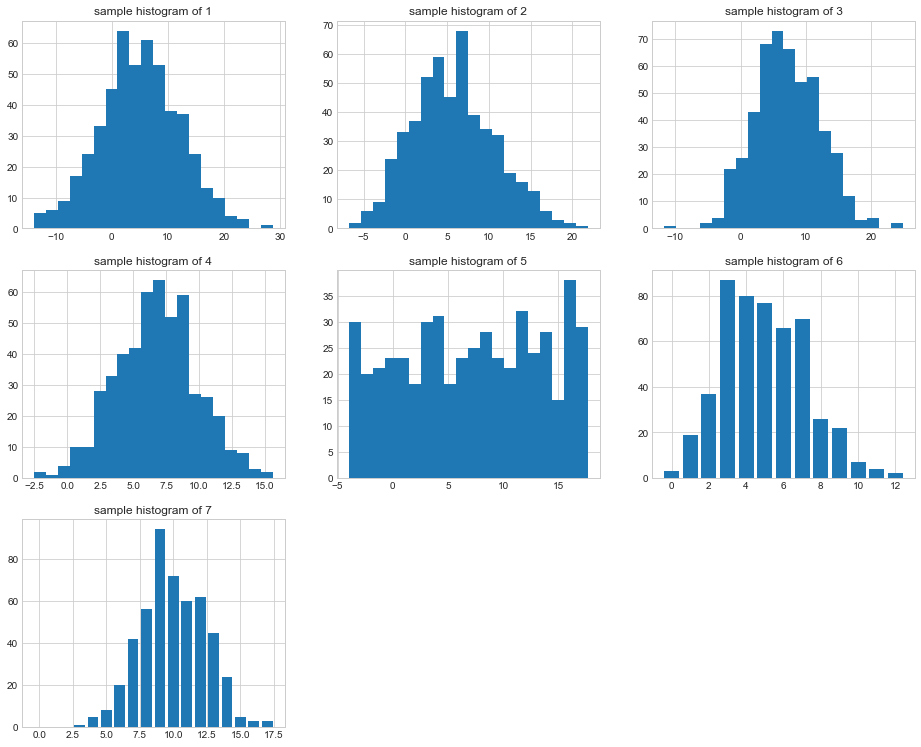

In [332]:
%pylab inline
plt.figure(figsize=(16, 13)) 
for i in range(7):
    plt.subplot(3, 3, i+1)
    plt.title('sample histogram of {}'.format(str(i+1)))
    if i > 4:
        ranger = int(previous_eval_charct.loc['maximun'][str(i+1)] + 1)
        pylab.bar(range(ranger), np.bincount(data.iloc[:, i]))
    else:
        plt.hist(data.iloc[:, i], bins=20)

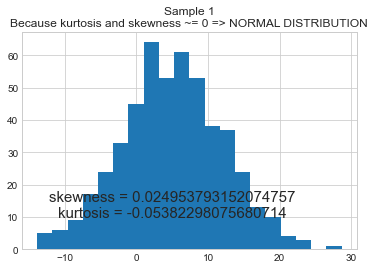

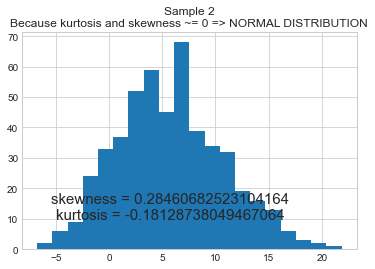

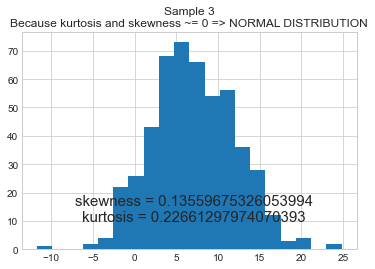

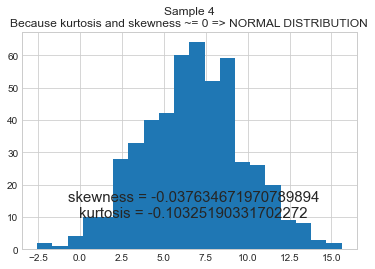

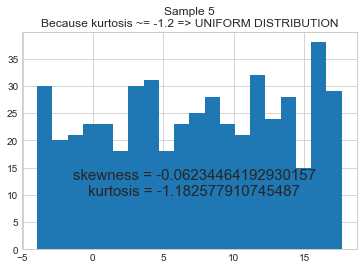

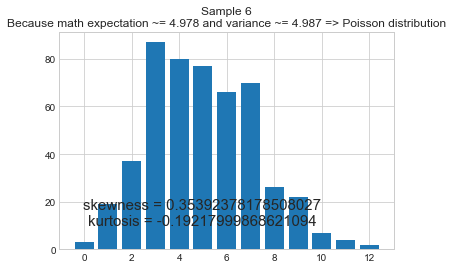

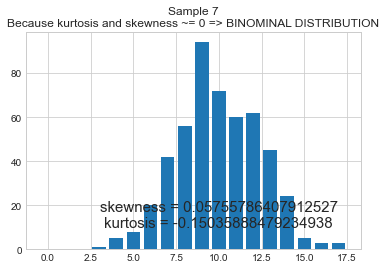

In [333]:
dct_title = {
    1 : "Because kurtosis and skewness ~= 0 => NORMAL DISTRIBUTION",
    2 : "Because kurtosis and skewness ~= 0 => NORMAL DISTRIBUTION",
    3 : "Because kurtosis and skewness ~= 0 => NORMAL DISTRIBUTION",
    4 : "Because kurtosis and skewness ~= 0 => NORMAL DISTRIBUTION",
    5 : "Because kurtosis ~= -1.2 => UNIFORM DISTRIBUTION",
    6 : "Because math expectation ~= 4.978 and variance ~= 4.987 => Poisson distribution",
    7 : "Because kurtosis and skewness ~= 0 => BINOMINAL DISTRIBUTION",
}
for i in range (7):
    plt.title(f'Sample {i+1}\n{dct_title[i+1]}')
    plt.text(eval_charact.iloc[0][i], 10,
             f"skewness = {eval_charact.iloc[7][i]}\nkurtosis = {eval_charact.iloc[6][i]}",
             fontsize='15',ha='center')
    if i > 4:
        ranger = int(previous_eval_charct.loc['maximun'][str(i+1)] + 1)
        pylab.bar(range(ranger), np.bincount(data.iloc[:, i]))
    else:
        plt.hist(data.iloc[:, i], bins=20)
    plt.show()

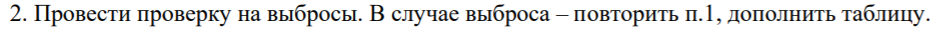

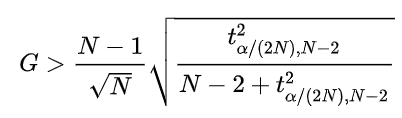

In [334]:
from scipy.stats import t
import math
N = 500
alpha_div_2N = 0.1/1000
table_t = t.ppf(q=alpha_div_2N,df=N-2)
G = ((N-1)/math.sqrt(N))*math.sqrt(table_t**2/(N-2+table_t**2))
G

3.695175048300439

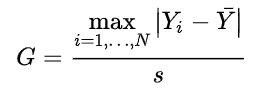

In [335]:
for i in range (cnt_samples):
    G_min = abs(current_eval_charact.loc['minimum'][i] - eval_charact.loc['mean'][i])/eval_charact.loc['standard deviation'][i]
    G_max = abs(current_eval_charact.loc['maximun'][i] - eval_charact.loc['mean'][i])/eval_charact.loc['standard deviation'][i]
    if G_min > G:
        print(f'\tAn outlier was detected in the sample {i+1}')
        print('\t%.3f > %.3f'% (G_min, G))
    else:
        print(f'\tAn outlier min was no detected in the sample {i+1}')
    if G_max > G:
        print(f'\tAn outlier was detected in the sample {i+1}')
        print('\t%.3f > %.3f'% (G_max, G))
    else:
        print(f'\tAn outlier max was no detected in the sample {i+1}')
        
#         print('\t%.3f change the value to the mathematical expectation %.3f' % (data.iloc[j][i], eval_charact.loc['mean'][i]))
#         data.at[j, i] = eval_charact.loc['mean'][i]

	An outlier min was no detected in the sample 1
	An outlier max was no detected in the sample 1
	An outlier min was no detected in the sample 2
	An outlier max was no detected in the sample 2
	An outlier min was no detected in the sample 3
	An outlier max was no detected in the sample 3
	An outlier min was no detected in the sample 4
	An outlier max was no detected in the sample 4
	An outlier min was no detected in the sample 5
	An outlier max was no detected in the sample 5
	An outlier min was no detected in the sample 6
	An outlier max was no detected in the sample 6
	An outlier min was no detected in the sample 7
	An outlier max was no detected in the sample 7


In [336]:
# for k in range (3):
#     print(f'{k+1} pass')
#     for i in range (cnt_samples):
#         if i != 4 and i != 5:
#             for j in range (data.shape[0]):
#                 if G_current > G:
#                     print(f'\tAn outlier was detected in the sample {i+1}')
#                     print('\t%.3f > %.3f'% (G_current, G))
#                     print('\t%.3f change the value to the mathematical expectation %.3f' % (data.iloc[j][i], eval_charact.loc['mean'][i]))
#                     data.at[j, i] = eval_charact.loc['mean'][i]
# #                     print(sorted(data.iloc[j,i]))

1 pass
2 pass
3 pass


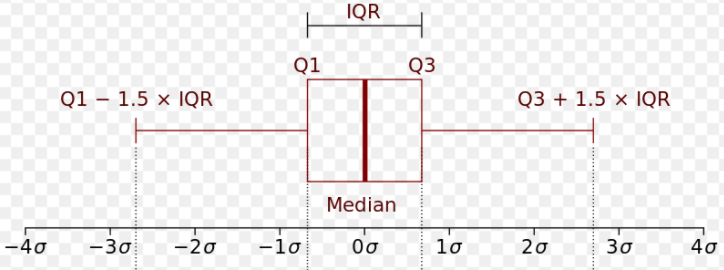

For samples which have not normal distribution
Samples 5


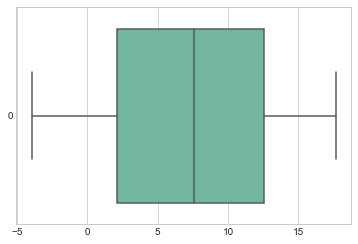

Samples 6


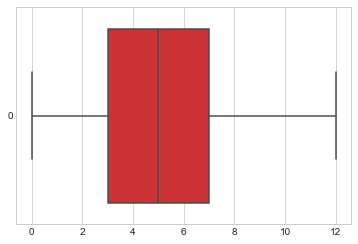

In [337]:
# print('For samples which have not normal distribution')
# import seaborn as sns
# print('Samples 5')
# ax = sns.boxplot(data=data.iloc[:,4], orient="h", palette="Set2", whis=1.5)
# plt.show()
# print('Samples 6')
# x = sns.boxplot(data=data.iloc[:,5], orient="h", palette="Set1", whis=1.5)

# TODO CORRECT 7 SAMPLES ON BINOMINAL DIST AND PREVIOUS TASK

PREVIOUS


,1,2,3,4,5,6,7
mean,4.996,5.754,7.130,6.778,7.204,4.978,9.980
standart error,0.319,0.224,0.226,0.137,0.284,0.100,0.108
median,4.998,5.599,6.793,6.845,7.581,5.000,10.000
mode,7.463,-1.180,11.323,11.587,0.923,3.000,9.000
standard deviation,7.127,5.008,5.063,3.052,6.343,2.233,2.420
variance,50.797,25.075,25.630,9.317,40.240,4.987,5.855
kurtosis,-0.054,-0.181,0.227,-0.103,-1.183,-0.192,-0.150
skewness,0.025,0.285,0.136,-0.038,-0.062,0.354,0.058
span,42.512,28.613,36.525,18.144,21.626,12.000,14.000
minimum,-13.872,-6.765,-11.708,-2.545,-3.961,0.000,3.000


CURRENT


,1,2,3,4,5,6,7
mean,4.996,5.754,7.130,6.778,7.204,4.978,9.980
standart error,0.319,0.224,0.226,0.137,0.284,0.100,0.108
median,4.998,5.599,6.793,6.845,7.581,5.000,10.000
mode,7.463,-1.180,11.323,11.587,0.923,3.000,9.000
standard deviation,7.127,5.008,5.063,3.052,6.343,2.233,2.420
variance,50.797,25.075,25.630,9.317,40.240,4.987,5.855
kurtosis,-0.054,-0.181,0.227,-0.103,-1.183,-0.192,-0.150
skewness,0.025,0.285,0.136,-0.038,-0.062,0.354,0.058
span,42.512,28.613,36.525,18.144,21.626,12.000,14.000
minimum,-13.872,-6.765,-11.708,-2.545,-3.961,0.000,3.000


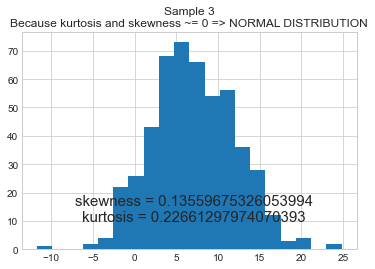

In [338]:
current_eval_charact = evalution_of_characteristics(eval_charact)
print('PREVIOUS')
display(previous_eval_charct)
print('CURRENT')
display(current_eval_charact)
plt.hist(data.iloc[:, 2], bins=20)
plt.title(f'Sample {2+1}\n{dct_title[2+1]}')
plt.text(eval_charact.iloc[0][2], 10,
         f"skewness = {eval_charact.iloc[7][2]}\nkurtosis = {eval_charact.iloc[6][2]}",
         fontsize='15',ha='center')
plt.show()

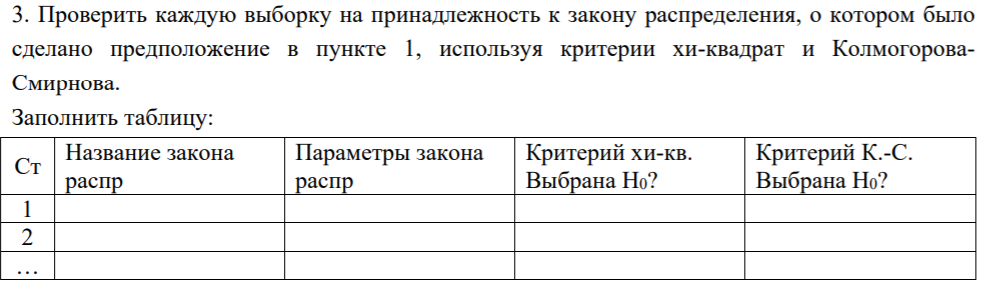

In [339]:
base = [['.']*4 for i in range (cnt_samples)]
criteria_table = pd.DataFrame(base, index=[1,2,3,4,5,6,7],
                             columns=[
                                 'name',
                                 'parameters',
                                 'chi-square',
                                 'K.-S.'
                             ])
dct_distribution = {
    1 : ["normal"],
    2 : ["normal"],
    3 : ["normal"],
    4 : ["normal"],
    5 : ["uniform"],
    6 : ["poisson"],
    7 : ["binominal"], # TODO
}

for i in range (1, cnt_samples+1):
    criteria_table.loc[i]['name'] = dct_distribution[i][0]
    if criteria_table.loc[i]['name'] == "normal":
        criteria_table.loc[i]['parameters'] = 'μ = '+ str(current_eval_charact.loc['mean'][str(i)]) + '  σ = '+ str(current_eval_charact.loc['standard deviation'][str(i)])
criteria_table.loc[5]['parameters'] = ' a = ' + str(current_eval_charact.loc['minimum'][str(5)]) + ' b = ' + str(current_eval_charact.loc['maximun'][str(5)])
criteria_table.loc[6]['parameters'] = ' λ = '+ str(current_eval_charact.loc['mean'][str(6)])
expected_probability = round(1 / (current_eval_charact.loc['maximun']['5'] - current_eval_charact.loc['minimum']['5']), 3)
criteria_table.loc[7]['parameters'] = 'n = 500 p = ' + str(expected_probability)
criteria_table

,name,parameters,chi-square,K.-S.
1,normal,μ = 4.996 σ = 7.127,.,.
2,normal,μ = 5.754 σ = 5.008,.,.
3,normal,μ = 7.13 σ = 5.063,.,.
4,normal,μ = 6.778 σ = 3.052,.,.
5,uniform,a = -3.961 b = 17.666,.,.
6,poisson,λ = 4.978,.,.
7,binominal,n = 500 p = 0.046,.,.


In [340]:
current_eval_charact

,1,2,3,4,5,6,7
mean,4.996,5.754,7.130,6.778,7.204,4.978,9.980
standart error,0.319,0.224,0.226,0.137,0.284,0.100,0.108
median,4.998,5.599,6.793,6.845,7.581,5.000,10.000
mode,7.463,-1.180,11.323,11.587,0.923,3.000,9.000
standard deviation,7.127,5.008,5.063,3.052,6.343,2.233,2.420
variance,50.797,25.075,25.630,9.317,40.240,4.987,5.855
kurtosis,-0.054,-0.181,0.227,-0.103,-1.183,-0.192,-0.150
skewness,0.025,0.285,0.136,-0.038,-0.062,0.354,0.058
span,42.512,28.613,36.525,18.144,21.626,12.000,14.000
minimum,-13.872,-6.765,-11.708,-2.545,-3.961,0.000,3.000


sum expected = 497.744922790373


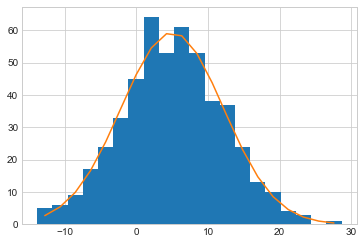

Power_divergenceResult(statistic=8.750567808002556, pvalue=0.9477633974555477)
chisquare = 8.750567808002556
degree freedom = 17
significance level = 0.05
critical value according to the table 27.587
8.751 < 27.587
Ho - accepted
0.9477633974555477
sum expected = 496.5654661774898


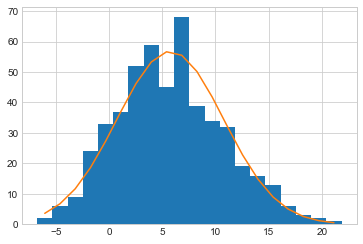

Power_divergenceResult(statistic=18.401465598217776, pvalue=0.3639475224645955)
chisquare = 18.401465598217776
degree freedom = 17
significance level = 0.05
critical value according to the table 27.587
18.401 < 27.587
Ho - accepted
0.3639475224645955
sum expected = 499.83113051963824


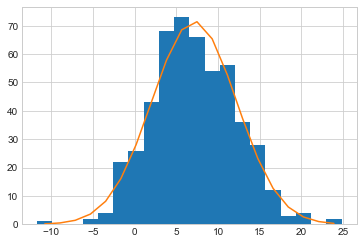

Power_divergenceResult(statistic=30.154750804288966, pvalue=0.025250396363075897)
chisquare = 30.154750804288966
degree freedom = 17
significance level = 0.05
critical value according to the table 27.587
30.155 > 27.587
Ho - rejected
0.02525039636307591
sum expected = 498.4749000684404


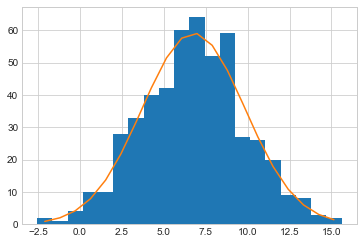

Power_divergenceResult(statistic=15.081768435837857, pvalue=0.5895919041678107)
chisquare = 15.081768435837857
degree freedom = 17
significance level = 0.05
critical value according to the table 27.587
15.082 < 27.587
Ho - accepted
0.5895919041678107


In [341]:
from scipy import stats
len_samples = data.shape[0]
for i in range (4):
    observed_frequency, interval, pictire = plt.hist(data.iloc[:, i], bins=20)
    mean = current_eval_charact.loc['mean'][str(i+1)]
    standart_deviation = current_eval_charact.loc['standard deviation'][str(i+1)]
    expected_frequency = []
    for j in range (len(interval)-1):
        left_border = stats.norm.cdf(interval[j], loc=mean, scale=standart_deviation)
        right_border = stats.norm.cdf(interval[j + 1], loc=mean, scale=standart_deviation)
        probability_in_interval = right_border - left_border
        expected_frequency.append(probability_in_interval * len_samples)
    print('sum expected =',sum(expected_frequency))
#         print(expected_frequency)
    mid_intervals = []
    for k in range (len(interval)-1):
        mid_intervals.append((interval[k] + interval[k + 1])/2)
    plt.plot(mid_intervals, expected_frequency)
    plt.show()
    chisquare = stats.chisquare(observed_frequency, expected_frequency, ddof=2)
    print(chisquare)
    chisquare = 0
    for w in range (20):
        chisquare += ((observed_frequency[w] - expected_frequency[w])**2)/expected_frequency[w]
    print('chisquare =', chisquare)
    print(f'degree freedom = {20 - 2 - 1}')
    print(f'significance level = {0.05}')
    critical_value = 27.587
    print(f'critical value according to the table {critical_value}')
    if chisquare < critical_value:
        print('%.3f < %.3f' % (chisquare, critical_value))
        print('Ho - accepted')
        criteria_table.loc[i+1]['chi-square'] = '+'
    else:
        print('%.3f > %.3f' % (chisquare, critical_value))
        print('Ho - rejected')
        criteria_table.loc[i+1]['chi-square'] = '-'
    print(1-stats.chi2.cdf(chisquare, 17))

Power_divergenceResult(statistic=29.444921735793205, pvalue=0.059301339850827715)
chisquare = 29.444921735793205
degree freedom = 19
significance level = 0.05
critical value according to the table 30.144
29.445 < 30.144
Ho - accepted
use func = 0.05930133985082775


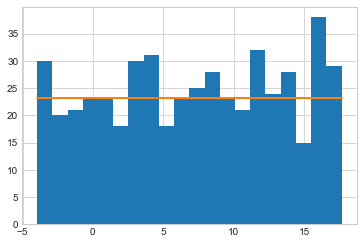

In [342]:
expected_probability = 1 / (current_eval_charact.loc['maximun']['5'] - current_eval_charact.loc['minimum']['5'])
expected_frequency = expected_probability * len_samples
observed_frequency, interval, pictire = plt.hist(data.iloc[:, 4], bins=20)
plt.plot(data.iloc[:, 4], [expected_frequency]*500)
expected_frequency = [expected_frequency]*20
chisquare = 0
for w in range (20):
    chisquare += ((observed_frequency[w] - expected_frequency[w])**2)/expected_frequency[w]
print(stats.chisquare(observed_frequency, expected_frequency))
print('chisquare =', chisquare)
print(f'degree freedom = {20 - 1}')
print(f'significance level = {0.05}')
critical_value = 30.144
print(f'critical value according to the table {critical_value}')
if chisquare < critical_value:
    print('%.3f < %.3f' % (chisquare, critical_value))
    print('Ho - accepted')
    criteria_table.loc[5]['chi-square'] = '+'
else:
    print('%.3f > %.3f' % (chisquare, critical_value))
    print('Ho - rejected')
    criteria_table.loc[5]['chi-square'] = '-'
print('use func =', 1-stats.chi2.cdf(29.444921735793205, 19))

Power_divergenceResult(statistic=16.476195039271122, pvalue=0.12435261977707884)
chisquare = 16.408723986756243
degree freedom = 18
significance level = 0.05
critical value according to the table 28.869
16.409 < 28.869
Ho - accepted


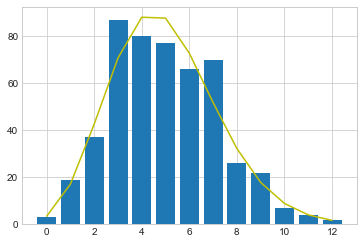

In [343]:
# %pylab inline
observed_frequency = np.bincount(data.iloc[:, 5])
ranger = int(current_eval_charact.loc['maximun']['6'] + 1)
pylab.bar(range(ranger), observed_frequency)
mean = current_eval_charact.loc['mean'][str(6)]
expected_frequency = [len_samples*stats.poisson.pmf(x, mean) for x in range(ranger)]
plt.plot(range(ranger), expected_frequency, c='y')

chisquare = 0
for w in range (12):
    chisquare += ((observed_frequency[w] - expected_frequency[w])**2)/expected_frequency[w]
print(stats.chisquare(observed_frequency, expected_frequency, ddof=1))
print('chisquare =', chisquare)
print(f'degree freedom = {20 - 1 - 1}')
print(f'significance level = {0.05}')
critical_value = 28.869
print(f'critical value according to the table {critical_value}')
if chisquare < critical_value:
    print('%.3f < %.3f' % (chisquare, critical_value))
    print('Ho - accepted')
    criteria_table.loc[6]['chi-square'] = '+'
else:
    print('%.3f > %.3f' % (chisquare, critical_value))
    print('Ho - rejected')
    criteria_table.loc[6]['chi-square'] = '-'
    #todo redo 1 task use np.bincount inplace hist

Power_divergenceResult(statistic=52.770474754155735, pvalue=4.5252611507779636e-07)
chisquare = 52.770474754155735
degree freedom = 17
significance level = 0.05
critical value according to the table 27.587
52.770 > 27.587
Ho - rejected


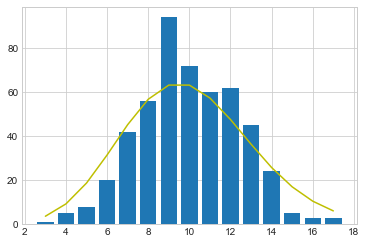

In [344]:
observed_frequency = np.bincount(data.iloc[:, 6])
observed_frequency = np.delete(observed_frequency, np.where(observed_frequency==0))
# ranger = int(current_eval_charact.loc['maximun']['7'] + 1)
right = int(current_eval_charact.loc['maximun']['7'] + 1)
left = int(current_eval_charact.loc['minimum']['7'])
pylab.bar(range(left, right), observed_frequency)

mean = current_eval_charact.loc['mean'][str(7)]
# m = np
probability_success = mean / len_samples
expected_frequency = [len_samples*stats.binom.pmf(x, len_samples, probability_success) for x in range(left, right)]
plt.plot(range(left, right), expected_frequency, c='y')

chisquare = 0
for w in range (right-left):
    chisquare += ((observed_frequency[w] - expected_frequency[w])**2)/expected_frequency[w]
print(stats.chisquare(observed_frequency, expected_frequency, ddof=2))
print('chisquare =', chisquare)
print(f'degree freedom = {20 - 1 - 2}')
print(f'significance level = {0.05}')
critical_value = 27.587
print(f'critical value according to the table {critical_value}')
if chisquare < critical_value:
    print('%.3f < %.3f' % (chisquare, critical_value))
    print('Ho - accepted')
    criteria_table.loc[7]['chi-square'] = '+'
else:
    print('%.3f > %.3f' % (chisquare, critical_value))
    print('Ho - rejected')
    criteria_table.loc[7]['chi-square'] = '-'
    #todo redo 1 task use np.bincount inplace hist

In [345]:
crit_value = 0.05
for i in range(4):
    ks_value, pvalue = stats.kstest(data.iloc[:][i], 'norm', args=(current_eval_charact.loc['mean'][str(i+1)], current_eval_charact.loc['standard deviation'][str(i+1)]))
    print(f'Samples {i+1}. KstestResult(statistic=%.3f, pvalue=%.3f)' % (ks_value, pvalue))
    if crit_value < pvalue: # auto comput ddof 
        print('Ho - accepted')
        criteria_table.loc[i+1]['K.-S.'] = '+'
    else:
        print('Ho - rejected')
        criteria_table.loc[i+1]['K.-S.'] = '-'
    
ks_value, pvalue = stats.kstest(data.iloc[:][4], 'uniform', args=(current_eval_charact.loc['minimum'][str(5)], current_eval_charact.loc['maximun'][str(5)]))
print(f'Samples {5}. KstestResult(statistic=%.3f, pvalue=%.3f)' % (ks_value, pvalue))
if crit_value < pvalue: 
    print('Ho - accepted')
    criteria_table.loc[5]['K.-S.'] = '+'
else:
    print('Ho - rejected')
    criteria_table.loc[5]['K.-S.'] = '-'

ks_value, pvalue = stats.kstest(data.iloc[:][5], 'poisson', args=(current_eval_charact.loc['mean'][str(6)],))
print(f'Samples {6}. KstestResult(statistic=%.3f, pvalue=%.3f)' % (ks_value, pvalue))
if crit_value < pvalue: 
    print('Ho - accepted')
    criteria_table.loc[6]['K.-S.'] = '+'
else:
    print('Ho - rejected')
    criteria_table.loc[6]['K.-S.'] = '-'
    
    
mean = current_eval_charact.loc['mean'][str(7)]
# m = np
probability_success = mean / len_samples
ks_value, pvalue = stats.kstest(data.iloc[:][6], 'binom', args=(500, probability_success))
print(f'Samples {7}. KstestResult(statistic=%.3f, pvalue=%.3f)' % (ks_value, pvalue))
if crit_value < pvalue: 
    print('Ho - accepted')
    criteria_table.loc[7]['K.-S.'] = '+'
else:
    print('Ho - rejected')
    criteria_table.loc[7]['K.-S.'] = '-'    

# mean = current_eval_charact.loc['mean'][str(7)]
# m = np
# probability_success = mean / len_samples
# print(stats.kstest(data.iloc[:][6], 'binom', args=(500, probability_success)))
      
# mean = current_eval_charact.loc['mean'][str(6)]
# print(stats.kstest(data.iloc[:][0], 'norm', args=(5)))
# print(stats.kstest(data.iloc[:][5], 'poisson', args=(5, 0)))

Samples 1. KstestResult(statistic=0.020, pvalue=0.988)
Ho - accepted
Samples 2. KstestResult(statistic=0.036, pvalue=0.528)
Ho - accepted
Samples 3. KstestResult(statistic=0.032, pvalue=0.690)
Ho - accepted
Samples 4. KstestResult(statistic=0.031, pvalue=0.707)
Ho - accepted
Samples 5. KstestResult(statistic=0.201, pvalue=0.000)
Ho - rejected
Samples 6. KstestResult(statistic=0.168, pvalue=0.000)
Ho - rejected
Samples 7. KstestResult(statistic=0.195, pvalue=0.000)
Ho - rejected


In [346]:
criteria_table

,name,parameters,chi-square,K.-S.
1,normal,μ = 4.996 σ = 7.127,+,+
2,normal,μ = 5.754 σ = 5.008,+,+
3,normal,μ = 7.13 σ = 5.063,-,+
4,normal,μ = 6.778 σ = 3.052,+,+
5,uniform,a = -3.961 b = 17.666,+,-
6,poisson,λ = 4.978,+,-
7,binominal,n = 500 p = 0.046,-,-


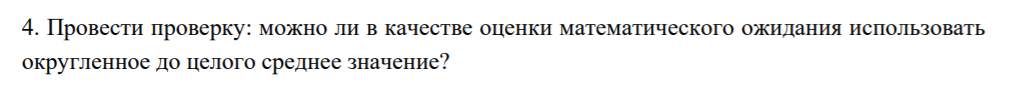

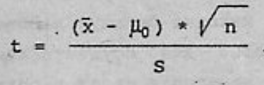
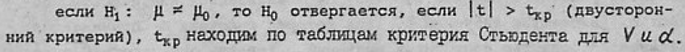

In [347]:
for i in range (4):
    df = len_samples - 1
    mean = statistics.mean(data.iloc[:][i])
    s = statistics.stdev(data.iloc[:][i])
    assumption = round(mean)
    t = ((mean - assumption) * math.sqrt(len_samples)) / s
#     pvalue = 2*(stats.t.cdf(t, df))  
    print('t =', t)
    statistic, pvalue = stats.ttest_1samp(data.iloc[:][i], assumption, alternative='two-sided')
    print(f'Ttest_1sampResult(statistic={statistic}, pvalue={pvalue})')
    if crit_value < pvalue: 
        print('Ho - accepted')
    else:
        print('Ho - rejected')

t = -0.012957929855413433
Ttest_1sampResult(statistic=-0.012957929855413433, pvalue=0.989666536112085)
Ho - accepted
t = -1.0981538243102669
Ttest_1sampResult(statistic=-1.0981538243102669, pvalue=0.2726669163174599)
Ho - accepted
t = 0.5728066581468778
Ttest_1sampResult(statistic=0.5728066581468777, pvalue=0.5670336156920738)
Ho - accepted
t = -1.6245812449860866
Ttest_1sampResult(statistic=-1.6245812449860864, pvalue=0.1048832490439493)
Ho - accepted


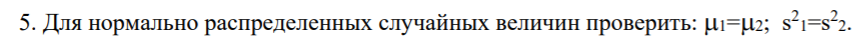

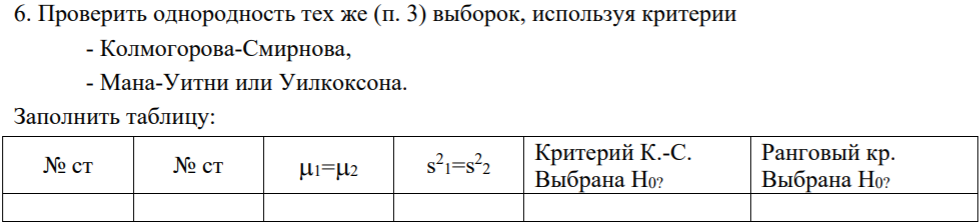

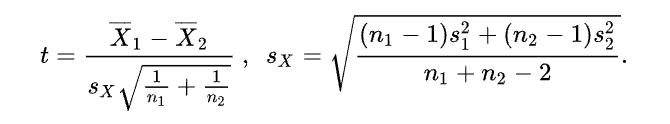

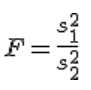

In [348]:
base = [['.']*6 for i in range (6)]
test_table_for_samples = pd.DataFrame(base,
                                      columns=[
                                          '№first_sample',
                                          '№second_sample',
                                          'm1=m2',
                                          's1**2=s2**2',
                                          'K.S.',
                                          'manna-whitney'
                                      ])

Sample 1 and sample 2
m1 = 4.9958698049340455 and m2 = 5.754075292912603
t = -1.946387868838565
Ttest_1sampResult(statistic=-1.9463878688385647, pvalue=0.051888501766554955)
Ho - accepted

var1 = 50.797212625164896 and var2 = 25.07540598574658
F = 2.0257782727043048
Left border = 0.8388857772763105 and right border = 1.1920574017201653
Ho - rejected

KstestResult(statistic=0.13, pvalue=0.00042124348957333854)
Ho - rejected



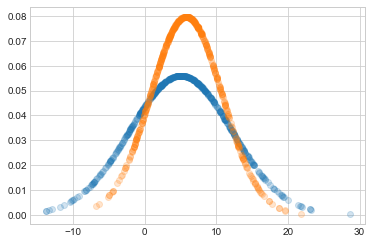

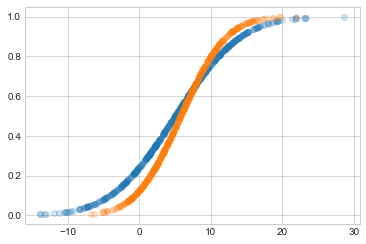

MannwhitneyuResult(statistic=117295.0, pvalue=0.045789365784533985)
Ho - rejected

WilcoxonResult(statistic=56157.0, pvalue=0.045388596698339174)
Ho - rejected

Sample 1 and sample 3
m1 = 4.9958698049340455 and m3 = 7.129688385186455
t = -5.4577952030101375
Ttest_1sampResult(statistic=-5.457795203010137, pvalue=6.082388775539252e-08)
Ho - rejected

var1 = 50.797212625164896 and var3 = 25.63043958493964
F = 1.9819095359961432
Left border = 0.8388857772763105 and right border = 1.1920574017201653
Ho - rejected

KstestResult(statistic=0.21, pvalue=4.602215863108133e-10)
Ho - rejected



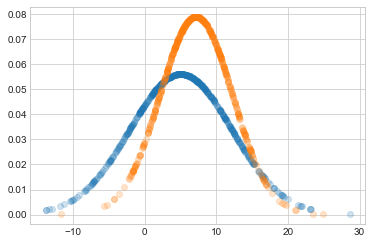

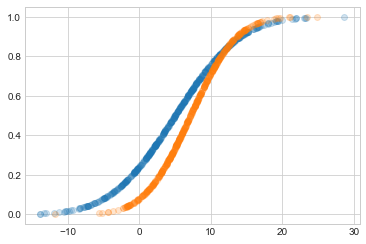

MannwhitneyuResult(statistic=101293.0, pvalue=1.0444960799993472e-07)
Ho - rejected

WilcoxonResult(statistic=45343.0, pvalue=8.96155375990069e-08)
Ho - rejected

Sample 1 and sample 4
m1 = 4.9958698049340455 and m4 = 6.778236806378118
t = -5.140369413139757
Ttest_1sampResult(statistic=-5.140369413139757, pvalue=3.298372979284072e-07)
Ho - rejected

var1 = 50.797212625164896 and var4 = 9.316784890960625
F = 5.452225549872855
Left border = 0.8388857772763105 and right border = 1.1920574017201653
Ho - rejected

KstestResult(statistic=0.296, pvalue=1.0169749397308431e-19)
Ho - rejected



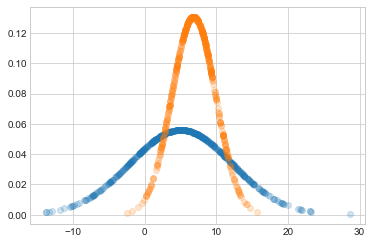

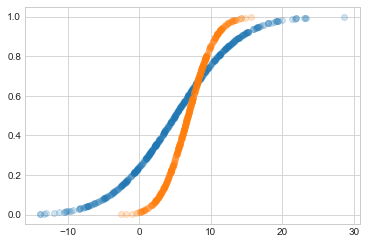

MannwhitneyuResult(statistic=101874.0, pvalue=2.052619164652346e-07)
Ho - rejected

WilcoxonResult(statistic=46954.0, pvalue=1.2458045062714207e-06)
Ho - rejected

Sample 2 and sample 3
m2 = 5.754075292912603 and m3 = 7.129688385186455
t = -4.319687085155816
Ttest_1sampResult(statistic=-4.319687085155816, pvalue=1.718630114456132e-05)
Ho - rejected

var2 = 25.07540598574658 and var3 = 25.63043958493964
F = 1.0221345807724327
Left border = 0.8388857772763105 and right border = 1.1920574017201653
Ho - accepted

KstestResult(statistic=0.14, pvalue=0.00010844915031869944)
Ho - rejected



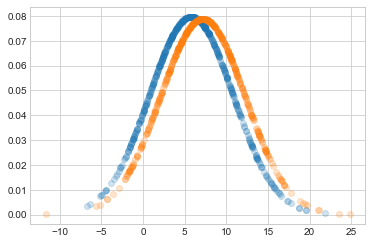

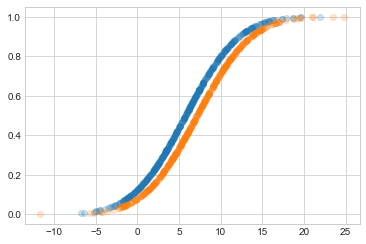

MannwhitneyuResult(statistic=104994.0, pvalue=5.91233499160142e-06)
Ho - rejected

WilcoxonResult(statistic=48331.0, pvalue=9.770042622260945e-06)
Ho - rejected

Sample 2 and sample 4
m2 = 5.754075292912603 and m4 = 6.778236806378118
t = -3.905022428382279
Ttest_1sampResult(statistic=-3.9050224283822805, pvalue=0.00010055261598378095)
Ho - rejected

var2 = 25.07540598574658 and var4 = 9.316784890960625
F = 2.6914226612739944
Left border = 0.8388857772763105 and right border = 1.1920574017201653
Ho - rejected

KstestResult(statistic=0.21, pvalue=4.602215863108133e-10)
Ho - rejected



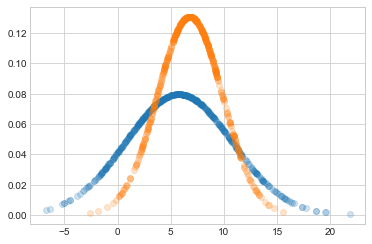

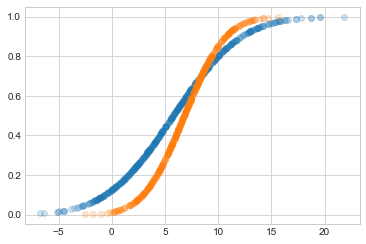

MannwhitneyuResult(statistic=104391.0, pvalue=3.198257267778271e-06)
Ho - rejected

WilcoxonResult(statistic=49710.0, pvalue=6.453782130370264e-05)
Ho - rejected

Sample 3 and sample 4
m3 = 7.129688385186455 and m4 = 6.778236806378118
t = 1.3293647418429988
Ttest_1sampResult(statistic=1.3293647418429988, pvalue=0.18403145784354355)
Ho - accepted

var3 = 25.63043958493964 and var4 = 9.316784890960625
F = 2.7509961735627195
Left border = 0.8388857772763105 and right border = 1.1920574017201653
Ho - rejected

KstestResult(statistic=0.166, pvalue=1.9751295221088777e-06)
Ho - rejected



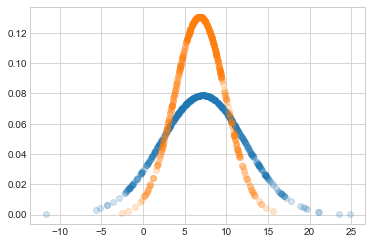

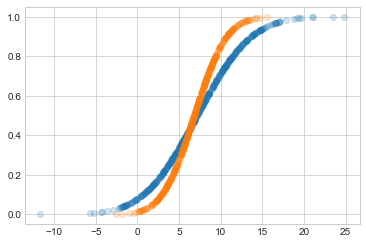

MannwhitneyuResult(statistic=121209.0, pvalue=0.20325750352771282)
Ho - accepted

WilcoxonResult(statistic=59647.0, pvalue=0.35688458749900465)
Ho - accepted



,№first_sample,№second_sample,m1=m2,s1**2=s2**2,K.S.,manna-whitney
0,1,2,+,-,-,-
1,1,3,-,-,-,-
2,1,4,-,-,-,-
3,2,3,-,+,-,-
4,2,4,-,-,-,-
5,3,4,+,-,-,+


In [349]:
cnt = 0
for i in range (3): # 0(1) 1(2) 2(3)
    m1 = statistics.mean(data.iloc[:][i])
    sd1 = statistics.stdev(data.iloc[:][i])
    for j in range (i + 1, 4): # 1(2) 2(3) 3(4)      2(3)  3(4)       3(4)
        print(f'Sample {i+1} and sample {j + 1}')
        m2 = statistics.mean(data.iloc[:][j])
        print(f'm{i+1} = {m1} and m{j+1} = {m2}')
        sd2 = statistics.stdev(data.iloc[:][j])
        numerator_s = (len_samples - 1)*sd1**2 + (len_samples - 1)*sd2**2
        denominator_s = len_samples + len_samples - 2
        s = math.sqrt(numerator_s / denominator_s)
        t = (m1 - m2) / (s * math.sqrt(1 / len_samples + 1 / len_samples))
        print(f't = {t}')
        statistic, pvalue = stats.ttest_ind(data.iloc[:][i], data.iloc[:][j])
        print(f'Ttest_1sampResult(statistic={statistic}, pvalue={pvalue})')
        
        test_table_for_samples.iloc[cnt]['№first_sample'] = str(i+1)
        test_table_for_samples.iloc[cnt]['№second_sample'] = str(j+1)
        if crit_value < pvalue: 
            print('Ho - accepted\n')
            test_table_for_samples.iloc[cnt]['m1=m2'] = '+'
        else:
            print('Ho - rejected\n')
            test_table_for_samples.iloc[cnt]['m1=m2'] = '-'
            
        print(f'var{i+1} = {statistics.variance(data.iloc[:][i])} and var{j+1} = {statistics.variance(data.iloc[:][j])}')
        if sd1**2 > sd2**2:
            F = sd1**2/sd2**2
            print(f'F = {F}')
        else:
            F = sd2**2/sd1**2
            print(f'F = {F}')
        left_border = stats.f.ppf(0.025, 499, 499)
        right_border = stats.f.ppf(0.975, 499, 499)
        print(f'Left border = {left_border} and right border = {right_border}')
        if left_border < F < right_border:
            print('Ho - accepted\n')
            test_table_for_samples.iloc[cnt]['s1**2=s2**2'] = '+'
        else:
            print('Ho - rejected\n')
            test_table_for_samples.iloc[cnt]['s1**2=s2**2'] = '-'
            
            
        statistic, pvalue = stats.ks_2samp(data.iloc[:][i], data.iloc[:][j])
        print(f'KstestResult(statistic={statistic}, pvalue={pvalue})')
        if pvalue > crit_value:
            print('Ho - accepted\n')
            test_table_for_samples.iloc[cnt]['K.S.'] = '+'
        else:
            print('Ho - rejected\n')
            test_table_for_samples.iloc[cnt]['K.S.'] = '-'
        mean
        plt.scatter(data.iloc[:][i],stats.norm.pdf(data.iloc[:][i], loc=m1, scale=sd1), alpha=0.2)
        plt.scatter(data.iloc[:][j],stats.norm.pdf(data.iloc[:][j], loc=m2, scale=sd2), alpha=0.2)
        plt.show()
        plt.scatter(data.iloc[:][i],stats.norm.cdf(data.iloc[:][i], loc=m1, scale=sd1), alpha=0.2)
        plt.scatter(data.iloc[:][j],stats.norm.cdf(data.iloc[:][j], loc=m2, scale=sd2), alpha=0.2)
        plt.show()
            
            
        statistic, pvalue = stats.mannwhitneyu(data.iloc[:][i], data.iloc[:][j])
        print(f'MannwhitneyuResult(statistic={statistic}, pvalue={pvalue})')
        if pvalue > crit_value:
            print('Ho - accepted\n')
            test_table_for_samples.iloc[cnt]['manna-whitney'] = '+'
        else:
            print('Ho - rejected\n')
            test_table_for_samples.iloc[cnt]['manna-whitney'] = '-'
            
        
        statistic, pvalue = stats.wilcoxon(data.iloc[:][i], data.iloc[:][j])
        print(f'WilcoxonResult(statistic={statistic}, pvalue={pvalue})')
        if pvalue > crit_value:
            print('Ho - accepted\n')
        else:
            print('Ho - rejected\n')
            
        cnt += 1
        
display(test_table_for_samples)

In [ ]:
Junior data scientist
DS: pandas, numpy, scipy, matplotlib, statistics, seaborn

ML: sklearn, xgboost 

Other: С++, MySQL, matlab, matcad
    
Курс от skillbox - Data Science

Курсовая работа по теме - Проектирование реляционной базы данных - на MySQL	

Калькулятор графов на C++

Видео курс - Тренировки по алгоритмам - от Яндекса

Моделирование систем - анализ выборок(дискретных, непрерывных), проверки на однородности двух выборок, обработки на выбросы, критерии на принадлежность к законам распределения с определенным уровнем значимости